In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 200)
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

## Defining files names
file_key_1 = 'Store-Sales-Time-Series-Forecast/oil.csv'
file_key_2 = 'Store-Sales-Time-Series-Forecast/holidays_events.csv'
file_key_3 = 'Store-Sales-Time-Series-Forecast/stores.csv'
file_key_4 = 'Store-Sales-Time-Series-Forecast/transactions.csv'
file_key_5 = 'Store-Sales-Time-Series-Forecast/train.csv'
file_key_6 = 'Store-Sales-Time-Series-Forecast/test.csv'

bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

bucket_object_2 = bucket.Object(file_key_2)
file_object_2 = bucket_object_2.get()
file_content_stream_2 = file_object_2.get('Body')

bucket_object_3 = bucket.Object(file_key_3)
file_object_3 = bucket_object_3.get()
file_content_stream_3 = file_object_3.get('Body')

bucket_object_4 = bucket.Object(file_key_4)
file_object_4 = bucket_object_4.get()
file_content_stream_4 = file_object_4.get('Body')

bucket_object_5 = bucket.Object(file_key_5)
file_object_5 = bucket_object_5.get()
file_content_stream_5 = file_object_5.get('Body')

bucket_object_6 = bucket.Object(file_key_6)
file_object_6 = bucket_object_6.get()
file_content_stream_6 = file_object_6.get('Body')

## Reading data-files
oil = pd.read_csv(file_content_stream_1)
holidays = pd.read_csv(file_content_stream_2)
stores = pd.read_csv(file_content_stream_3)
transactions = pd.read_csv(file_content_stream_4)
train = pd.read_csv(file_content_stream_5)
test = pd.read_csv(file_content_stream_6)

## Visualizing oil prices

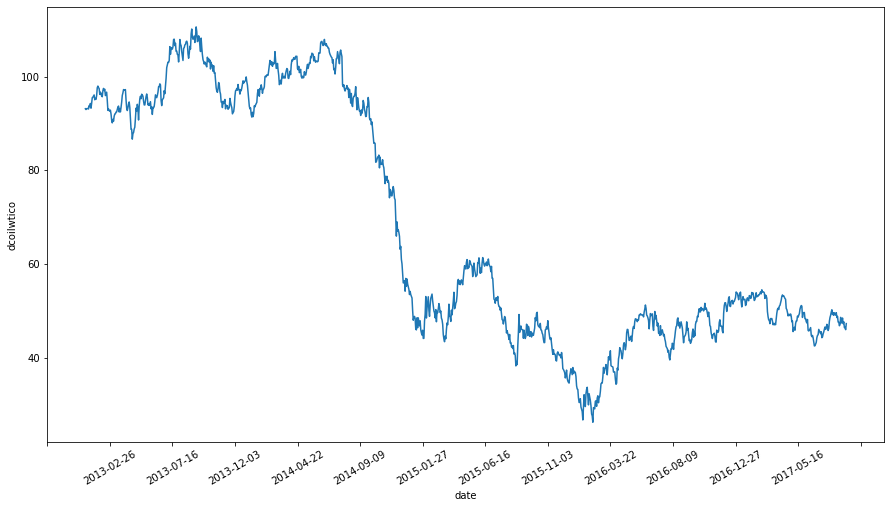

In [2]:
plt.figure(figsize = (15, 8))
ax = sns.lineplot(data = oil, x = 'date', y = 'dcoilwtico')
start, end = ax.get_xlim()
ax.set_xticks(np.arange(start, end, 100))
plt.xticks(rotation = 30);

## Holidays

In [31]:
holidays.columns = ['date', 'holiday_type', 'locale', 'locale_name', 'description', 'transferred']
holidays.head()

,date,holiday_type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [33]:
holidays['holiday_type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: holiday_type, dtype: int64

## Stores

In [34]:
stores.columns = ['store_nbr', 'city', 'state', 'store_type', 'cluster']
stores.head()

,store_nbr,city,state,store_type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [35]:
stores['store_type'].value_counts()

D    18
C    15
A     9
B     8
E     4
Name: store_type, dtype: int64

In [36]:
stores['cluster'].value_counts()

3     7
6     6
10    6
15    5
13    4
14    4
11    3
4     3
8     3
1     3
9     2
7     2
2     2
12    1
5     1
16    1
17    1
Name: cluster, dtype: int64

## Train

In [37]:
train = pd.merge(train, oil, on = 'date', how = 'left')
train = pd.merge(train, holidays, on = 'date', how = 'left')
train = pd.merge(train, stores, on = 'store_nbr', how = 'left')
train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13


In [38]:
data_temp = train[(train['store_nbr'] == 1) & (train['family'] == 'AUTOMOTIVE')]
data_temp.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0,93.14,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13
3564,3564,2013-01-03,1,AUTOMOTIVE,3.0,0,92.97,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13
5346,5346,2013-01-04,1,AUTOMOTIVE,3.0,0,93.12,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13
7128,7128,2013-01-05,1,AUTOMOTIVE,5.0,0,NaN,Work Day,National,Ecuador,Recupero puente Navidad,False,Quito,Pichincha,D,13


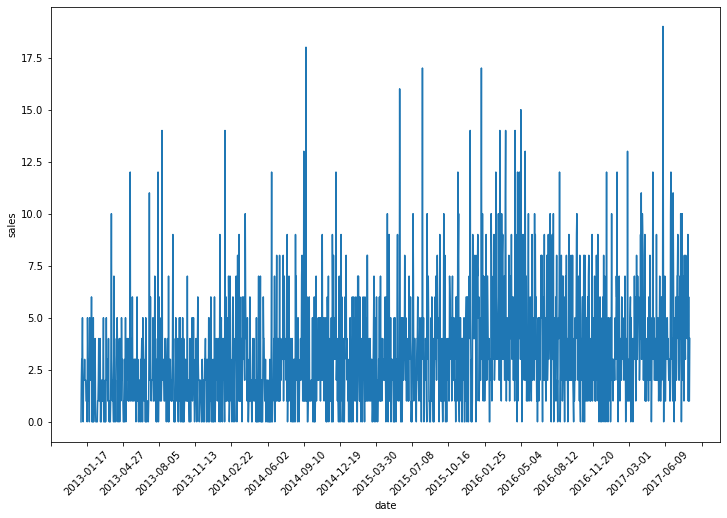

In [39]:
plt.figure(figsize = (12, 8))
ax = sns.lineplot(data = data_temp, x = 'date', y = 'sales')
start, end = ax.get_xlim()
ax.set_xticks(np.arange(start, end, 100))
plt.xticks(rotation = 45);

## Test

In [40]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
